# Getting Data from Spotify

In [2]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

In [3]:
SPOTIPY_CLIENT_ID=#Your Client ID
SPOTIPY_CLIENT_SECRET=#Secret key
client_credentials_manager = SpotifyClientCredentials(client_id=#'Your Client ID', client_secret='Secret key')

In [4]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET))

In [12]:
def show_tracks(tracks):
    for i, item in enumerate(tracks['items']):
        track = item['track']
        print (" %d %s %s" % (i, track['artists'][0]['name'],track['name']))

def get_track_features(track_id,sp):
    if track_id is None:
        return None
    else:
        features = sp.audio_features([track_id])
    return features

In [13]:
def get_features(tracks,sp):
    tracks_with_features=[]

    for track in tracks:
        features = get_track_features(track['id'],sp)
        print (track['name'])
        if not features:
            print("passing track %s" % track['name'])
            pass
        else:
            f = features[0]
            tracks_with_features.append(dict(
                                            name=track['name'],
                                            artist=track['artist'],
                                            id=track['id'],
                                            danceability=f['danceability'],
                                            energy=f['energy'],
                                            liveness=f['liveness'],
                                            valence=f['valence'],
                                            speechiness=f['speechiness'],
                                            loudness=f['loudness'],
                                            ))

        time.sleep(0.1)
    return tracks_with_features

In [14]:
def get_tracks_from_playlists(username, sp):
    playlists = sp.user_playlists(username)
    trackList = []
    for playlist in playlists['items']:
        if playlist['owner']['id'] == username:
            print (playlist['name'],' no. of tracks: ',playlist['tracks']['total'])
            results = sp.user_playlist(username, playlist['id'],fields="tracks,next")
            tracks = results['tracks']
            for i, item in enumerate(tracks['items']):
                track = item['track']
                trackList.append(dict(name=track['name'], id=track['id'], artist=track['artists'][0]['name']))

    return trackList

In [15]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET))
tracks = get_tracks_from_playlists(UserURI, sp)
tracks_with_features = get_features(tracks,sp)
df = pd.DataFrame(tracks_with_features)

sad girl shit   no. of tracks:  23
party  no. of tracks:  15
2am bolly   no. of tracks:  25
MD  no. of tracks:  39
🍒🍒  no. of tracks:  69
Hold On
Happier
Can I Be Him
happier
favorite crime
Choke
deja vu
Till Forever Falls Apart
CHICKEN TENDIES
How to Save a Life
Soul Mate
Astronomy
Can't Let You Go
remember the mornings
Please Notice
Happiest Year
Those Eyes
Next to You
With You
i don't want to watch the world end with someone else
Wait!
Broken
ilym (feat. ROSIE)
Chalo Chalein
Jeet
Raabta (From "Agent Vinod")
Ghungroo (From "War")
The Breakup Song
Chammak Challo
Sooraj Dooba Hain
Balam Pichkari
Matargashti
Suit Suit
Bom Diggy
Dilbar
Mere Rashke Qamar
High Rated Gabru
The Wakhra Song
Jag Soona Soona Lage
Channa Mereya
Samjhawan
Tum Hi Ho (From "Aashiqui 2")
Kabira
Sajdaa
Kun Faya Kun
Bin Tere
Dil Diyan Gallan
Sunn Raha Hai
Tere Sang Yaara
Agar Tum Saath Ho (From "Tamasha")
Baarish Lete Aana
Tera Yaar Hoon Main (From "Sonu Ke Titu Ki Sweety")
Kal Ho Naa Ho
Ae Dil Hai Mushkil Title Track

# EDA

In [3]:
df=pd.read_csv('mySongsDataset.csv')

In [4]:
df.head()

,name,artist,id,danceability,energy,liveness,valence,speechiness,loudness
0,Hold On,Chord Overstreet,5vjLSffimiIP26QG5WcN2K,0.618,0.443,0.0829,0.167,0.0526,-9.681
1,Happier,Ed Sheeran,2RttW7RAu5nOAfq6YFvApB,0.522,0.385,0.1350,0.236,0.0288,-7.355
2,Can I Be Him,James Arthur,0VhgEqMTNZwYL1ARDLLNCX,0.696,0.543,0.0939,0.479,0.0489,-6.164
3,happier,Olivia Rodrigo,2tGvwE8GcFKwNdAXMnlbfl,0.395,0.443,0.0839,0.338,0.1330,-9.720
4,favorite crime,Olivia Rodrigo,5JCoSi02qi3jJeHdZXMmR8,0.369,0.272,0.1470,0.218,0.0364,-10.497


In [10]:
df.describe()

,danceability,energy,liveness,valence,speechiness,loudness
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.657526,0.560067,0.154175,0.401084,0.114775,-7.053222
std,0.166263,0.183719,0.098992,0.200386,0.114580,2.133737
min,0.261000,0.056500,0.062500,0.059200,0.024800,-15.099000
25%,0.546500,0.434000,0.100500,0.236500,0.035700,-8.405000
50%,0.667000,0.553000,0.116000,0.384000,0.060700,-6.940000
75%,0.786500,0.694500,0.160000,0.522500,0.164000,-5.506500
max,0.964000,0.944000,0.658000,0.957000,0.564000,-2.661000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          171 non-null    object 
 1   artist        171 non-null    object 
 2   id            171 non-null    object 
 3   danceability  171 non-null    float64
 4   energy        171 non-null    float64
 5   liveness      171 non-null    float64
 6   valence       171 non-null    float64
 7   speechiness   171 non-null    float64
 8   loudness      171 non-null    float64
dtypes: float64(6), object(3)
memory usage: 12.1+ KB


In [39]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [6]:
from sklearn import preprocessing
loudness = df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
df[['loudness']]=loudness_scaled

In [7]:
features=df[['danceability','energy','liveness','valence','speechiness','loudness']]

In [10]:
list(features.mean())

[0.6575263157894733,
 0.5600672514619884,
 0.15417485380116958,
 0.40108421052631593,
 0.11477485380116957,
 0.6468707008986799]

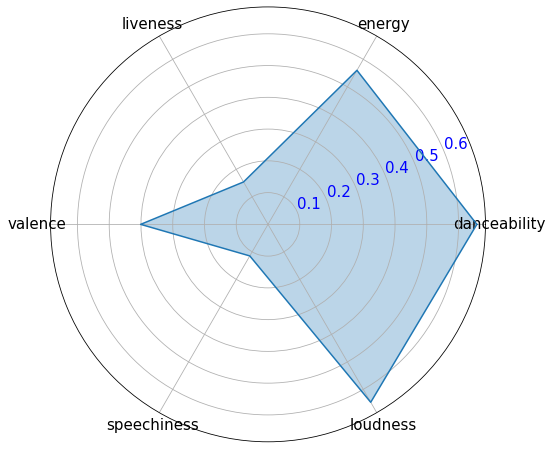

In [21]:
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(features.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(features.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*(math.pi) for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='blue',size=15)
plt.show()

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
kmeans_YPred = kmeans.predict(features)

In [12]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

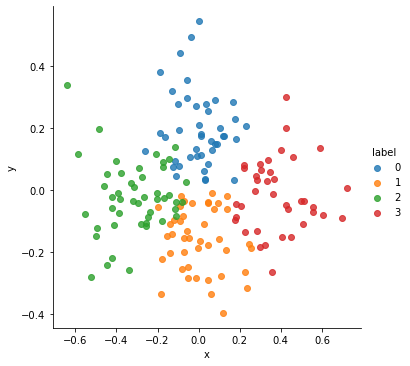

In [13]:
pc = pd.DataFrame(principal_components)
pc['label'] = kmeans_YPred
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [14]:
print (pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2']))

      danceability    energy  liveness   valence  speechiness  loudness
PC-1      0.263605  0.603086  0.088767  0.561944     0.117326  0.478929
PC-2      0.805708 -0.241375 -0.029572  0.064137     0.433628 -0.315518


In [15]:
df['label'] =kmeans_YPred
# shuffle dataset
df = df.sample(frac=1)
df['label'].value_counts()

2    47
0    43
1    43
3    38
Name: label, dtype: int64

In [18]:
df[df['label'] == 0].tail(20)
#rap

,name,artist,id,danceability,energy,liveness,valence,speechiness,loudness,label
111,HUMBLE.,Kendrick Lamar,0gvQoTWRxsW5Rd7KgPp0u3,0.908,0.621,0.0958,0.4210,0.1020,0.680254,0
159,Space Cadet (feat. Gunna),Metro Boomin,1fewSx2d5KIZ04wsooEBOz,0.901,0.464,0.2380,0.6380,0.0645,0.426918,0
77,Without Me,Halsey,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,0.0936,0.5330,0.0705,0.647130,0
132,Eyes Closed,G-Eazy,0rZ3xYyjHM9B1IBD9ixZ08,0.715,0.763,0.1030,0.3950,0.2400,0.705097,0
120,All Girls Are The Same,Juice WRLD,4VXIryQMWpIdGgYR4TrjT1,0.671,0.529,0.0856,0.2030,0.3070,0.632980,0
116,The Plan,G-Eazy,3hmrgEKcLEQi0rlk3mJfZ7,0.801,0.604,0.1590,0.3590,0.4230,0.584580,0
115,Power (feat. Nef The Pharaoh & P-Lo),G-Eazy,7BHEi0cFs6TVNFDvbBrAjz,0.839,0.743,0.1320,0.2610,0.2280,0.623734,0
158,Myself,NAV,05nbZ1xxVNwUTcGwLbp7CN,0.749,0.398,0.1150,0.0859,0.1710,0.615774,0
133,YOSEMITE,Travis Scott,7lAK3oHbfEnvUQWosrMMpR,0.785,0.554,0.1160,0.1440,0.0409,0.685641,0
165,No Question (feat Future),Rich The Kid,26oZOwsCywHXPRvLVORbgw,0.885,0.559,0.0973,0.5650,0.3220,0.644316,0


In [19]:
df[df['label'] == 1].tail(50)
#romantic

,name,artist,id,danceability,energy,liveness,valence,speechiness,loudness,label
90,It's Gotta Be You,Isaiah Firebrace,6cAKeFFYW2aClZSUyvqAEW,0.422,0.745,0.0981,0.588,0.0378,0.841534,1
119,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,0.3400,0.218,0.2000,0.632658,1
166,Champion (feat. Travis Scott),NAV,6nO3tr47nr2P7f3hXb8JIo,0.642,0.782,0.1080,0.396,0.0477,0.940987,1
69,Too Much To Ask,Niall Horan,39jXnbACjiaiTwwhsr5sY5,0.443,0.533,0.1280,0.201,0.0396,0.687490,1
92,Chasing Cars,Snow Patrol,11bD1JtSjlIgKgZG2134DZ,0.563,0.592,0.1320,0.136,0.0276,0.846438,1
55,Tum Se Hi,Pritam,7eQl3Yqv35ioqUfveKHitE,0.609,0.538,0.1250,0.608,0.0273,0.583454,1
53,Ae Dil Hai Mushkil Title Track,Pritam,1UWacd8x8tPPwmrPB1MoBI,0.495,0.654,0.1650,0.350,0.0679,0.680174,1
43,Sajdaa,Shankar-Ehsaan-Loy,5upmbnXemLfPvs3d2eyHml,0.468,0.737,0.0655,0.572,0.0765,0.629120,1
25,"Raabta (From ""Agent Vinod"")",Arijit Singh,6tzckBcK66LzeSA1Opnv35,0.657,0.581,0.1160,0.320,0.0298,0.562068,1
83,The Other,Lauv,0EAzlhtMYxRb6wbi6KnPjC,0.380,0.553,0.0788,0.384,0.0653,0.681621,1


In [20]:
df[df['label'] == 2].tail(15)
#Chill pop(kinda sad)

,name,artist,id,danceability,energy,liveness,valence,speechiness,loudness,label
95,Over And Over Again,Nathan Sykes,1ilQWV30hUZjBaupGUsaqK,0.610,0.250,0.0876,0.4460,0.0330,0.440666,2
0,Hold On,Chord Overstreet,5vjLSffimiIP26QG5WcN2K,0.618,0.443,0.0829,0.1670,0.0526,0.435601,2
84,The Story Never Ends,Lauv,3u5bTqHMM1P34ZkbwzdckV,0.614,0.126,0.1480,0.3510,0.0376,0.457951,2
18,With You,Dotan,7F4tdzXomvS7biLOJojIjs,0.597,0.440,0.0660,0.0656,0.0327,0.441389,2
9,How to Save a Life,Stephen Kramer Glickman,0hhR18R7KjZepv4wLQV7Pd,0.620,0.450,0.1220,0.3680,0.0288,0.567374,2
52,Kal Ho Naa Ho,Shankar-Ehsaan-Loy,251PNRmJU9KcUnFQAB5t6I,0.532,0.529,0.0780,0.2950,0.0352,0.538431,2
98,Crowded Room (feat. 6LACK),Selena Gomez,01GjnpiQIW3nA8S4utHPNI,0.724,0.415,0.1030,0.3280,0.0518,0.537948,2
70,I Won’t Give Up,Jason Mraz,26TzE0IIiuqPKLaWfcsj4C,0.543,0.329,0.1120,0.1410,0.0449,0.453369,2
97,Superhero,Lauv,1Fo4OvzP9PThFKMeMIAEYu,0.681,0.340,0.2850,0.4170,0.0339,0.521145,2
19,i don't want to watch the world end with someo...,Clinton Kane,58qX77t2VWMWcycsh9zKLc,0.535,0.359,0.1110,0.4880,0.0607,0.462775,2


In [21]:
df[df['label'] == 3].tail(20)
#Energetic

,name,artist,id,danceability,energy,liveness,valence,speechiness,loudness,label
27,The Breakup Song,Pritam,7BjQd0sfYsMGVrTpRdBNTT,0.818,0.930,0.6580,0.831,0.2470,0.974192,3
163,Carpet Burn,DaBaby,1N7CHs4eGjgr3gjyUgq75Y,0.824,0.859,0.2800,0.903,0.3020,0.758241,3
78,i'm so tired...,Lauv,7COXchtUOMd6uIT6HvmRaI,0.599,0.733,0.2420,0.534,0.2030,0.646487,3
124,Congratulations,Post Malone,14LOPYFegGakg50LJbVeai,0.630,0.804,0.2530,0.492,0.0363,0.877633,3
39,Channa Mereya,Pritam,0H2iJVgorRR0ZFgRqGUjUM,0.476,0.788,0.1060,0.746,0.0446,0.826339,3
143,Leave Me Alone,Flipp Dinero,5vDvBD3ReINP8dXUplj477,0.792,0.743,0.1830,0.742,0.0851,0.988342,3
128,Nice For What,Drake,3CA9pLiwRIGtUBiMjbZmRw,0.585,0.909,0.1190,0.758,0.0707,0.693439,3
33,Bom Diggy,Zack Knight,0O7jVsX1Sp98fV3802ccjY,0.793,0.777,0.1440,0.528,0.1970,0.760814,3
170,No Stylist (feat. Drake),French Montana,04MLEeAMuV9IlHEsD8vF6A,0.765,0.704,0.2270,0.498,0.1270,0.844991,3
32,Suit Suit,Guru Randhawa,2mwBSO58y92EYmEFpDfmS7,0.767,0.869,0.2210,0.751,0.0908,0.942113,3


In [23]:
from sklearn.model_selection import train_test_split
X = features
y = kmeans_YPred

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,criterion='gini')
forest.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred = forest.predict(X_test)
y_pred

array([3, 3, 2, 2, 3, 1, 2, 1, 3, 0, 2, 0, 0, 0, 0, 3, 0, 2, 2, 3, 1, 3,
       0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 3, 0, 1, 2, 3, 2, 3, 1, 0, 3, 0, 0,
       0, 1, 3, 1, 3, 1, 0, 0])

In [26]:
features1 = features.columns
list(zip(features[features1], forest.feature_importances_))

[('danceability', 0.2246702304226562),
 ('energy', 0.21778113086792428),
 ('liveness', 0.03691992880796098),
 ('valence', 0.1840248195648206),
 ('speechiness', 0.10263371375248315),
 ('loudness', 0.23397017658415487)]

In [27]:
#Average song features per cluster
label0_mean=df[df['label']==0].mean()
label1_mean=df[df['label']==1].mean()
label2_mean=df[df['label']==2].mean()
label3_mean=df[df['label']==3].mean()

In [32]:
import plotly.graph_objects as go
features_cols=['danceability', 'energy', 'liveness', 'valence', 'speechiness',
       'loudness']

fig = go.Figure(data=[
    go.Bar(name='Rap', x=features_cols, y=label0_mean),
    go.Bar(name='Romantic', x=features_cols, y=label1_mean),
    go.Bar(name='Chill pop(kinda sad)', x=features_cols, y=label2_mean),
    go.Bar(name='Energetic', x=features_cols, y=label3_mean)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[14  0  0  1]
 [ 0 11  0  2]
 [ 0  0 10  0]
 [ 1  0  0 13]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

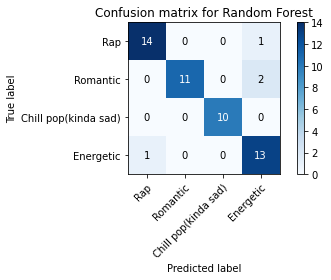

In [40]:
# Confusion matrix
definitions = ['Rap','Romantic','Chill pop(kinda sad)','Energetic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [45]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

                      precision    recall  f1-score   support

                 Rap       0.93      0.93      0.93        15
            Romantic       1.00      0.85      0.92        13
Chill pop(kinda sad)       1.00      1.00      1.00        10
           Energetic       0.81      0.93      0.87        14

            accuracy                           0.92        52
           macro avg       0.94      0.93      0.93        52
        weighted avg       0.93      0.92      0.92        52
forest


In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[13  0  2  0]
 [ 2 11  0  0]
 [ 0  0 10  0]
 [ 0  1  0 13]]


<AxesSubplot:title={'center':'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

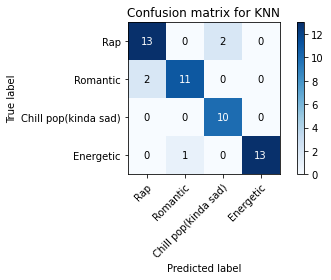

In [43]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [44]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

                      precision    recall  f1-score   support

                 Rap       0.87      0.87      0.87        15
            Romantic       0.92      0.85      0.88        13
Chill pop(kinda sad)       0.83      1.00      0.91        10
           Energetic       1.00      0.93      0.96        14

            accuracy                           0.90        52
           macro avg       0.90      0.91      0.90        52
        weighted avg       0.91      0.90      0.90        52
KNN
